In [7]:
from google.colab import files
uploaded = files.upload()

Saving PPP_QCA_FINAL_FUZZY.csv.xlsx to PPP_QCA_FINAL_FUZZY.csv.xlsx


In [8]:
import pandas as pd
import io

fn = next(iter(uploaded))
df = pd.read_excel(io.BytesIO(uploaded[fn]))
df.head()

,Y,f_Renegotiation,f_RevenueModel_type,f_VoiceOfAccountability_StakeholderEngagement,f_Macro_Enviromentimpact,f_Regulority_Qualityassess,f_ControlofCorruption,f_BiddingTeam,f_PPP_Procurement,f_Financial_capacity,...,f_Cost_efficiency,f_Environmental_Impact,f_Insitutional_contrcta_Enforecement,f_StakeholderSatisfaction,f_Outcome_specification,f_Service_Quality,f_Time,f_Cost,f_Quality,f_Smart_Innovation
0,0.5,1.0,0.5,9.812170e-01,0.016396,0.959145,0.991811,0.500000,0.5,0.5,...,0.050000,0.813395,0.989706,0.186605,0.186605,0.5,0.0,0.50,0.0,0.5
1,0.5,0.5,0.5,9.675880e-01,0.012033,0.950000,0.993583,0.500000,0.5,0.5,...,0.186605,0.813395,0.989706,0.186605,0.186605,0.5,0.0,0.50,0.5,0.5
2,0.5,0.5,0.5,9.811618e-01,0.016439,0.949790,0.989502,0.813395,0.5,0.5,...,0.186605,0.813395,0.951059,0.186605,0.186605,0.5,0.5,0.95,0.5,0.5
3,0.5,0.5,0.5,6.106955e-12,0.016439,0.949790,0.989502,0.813395,0.5,0.5,...,0.186605,0.813395,0.946121,0.186605,0.186605,0.5,0.5,0.95,0.5,0.5
4,0.5,0.5,0.5,9.713061e-01,0.014490,0.958972,0.994973,0.813395,0.5,0.5,...,0.186605,0.813395,0.986480,0.186605,0.186605,0.5,0.5,0.95,0.5,0.5


In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices()


2.19.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
print("df shape:", df.shape)

feature_cols = [
    "f_Renegotiation",
    "f_RevenueModel_type",
    "f_VoiceOfAccountability_StakeholderEngagement",
    "f_Macro_Enviromentimpact",
    "f_Regulority_Qualityassess",
    "f_ControlofCorruption",
    "f_BiddingTeam",
    "f_PPP_Procurement",
    "f_Financial_capacity",
    "f_Project_Financing",
    "f_Partnership_collabration",
    "f_Lifecycle_cost",
    "f_Political_Risk",
    "f_Sustainability",
    "f_Risk_allocation",
    "f_Cost_efficiency",
    "f_Environmental_Impact",
    "f_Outcome_specification"
]

target_cols = [
    "f_Time",
    "f_Cost",
    "f_Quality",
    "f_Financial_Viability",
    "f_Insitutional_contrcta_Enforecement",
    "f_Smart_Innovation"
]

missing = [c for c in feature_cols + target_cols if c not in df.columns]
print("Missing columns:", missing)

df shape: (237, 27)
Missing columns: []


In [10]:
df.columns.tolist()


['Y',
 'f_Renegotiation',
 'f_RevenueModel_type',
 'f_VoiceOfAccountability_StakeholderEngagement',
 'f_Macro_Enviromentimpact',
 'f_Regulority_Qualityassess',
 'f_ControlofCorruption',
 'f_BiddingTeam',
 'f_PPP_Procurement',
 'f_Financial_capacity',
 'f_Project_Financing',
 'f_Financial_Viability',
 'f_Partnership_collabration',
 'f_Lifecycle_cost',
 'f_Political_Risk',
 'f_Sustainability',
 'f_Risk_allocation',
 'f_Cost_efficiency',
 'f_Environmental_Impact',
 'f_Insitutional_contrcta_Enforecement',
 'f_StakeholderSatisfaction',
 'f_Outcome_specification',
 'f_Service_Quality',
 'f_Time',
 'f_Cost',
 'f_Quality',
 'f_Smart_Innovation']

In [11]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# -----------------------------
# 1) Define features & targets
# -----------------------------
feature_cols = [
    "f_Renegotiation",
    "f_RevenueModel_type",
    "f_VoiceOfAccountability_StakeholderEngagement",
    "f_Macro_Enviromentimpact",
    "f_Regulority_Qualityassess",
    "f_ControlofCorruption",
    "f_BiddingTeam",
    "f_PPP_Procurement",
    "f_Financial_capacity",
    "f_Project_Financing",
    "f_Partnership_collabration",
    "f_Lifecycle_cost",
    "f_Political_Risk",
    "f_Sustainability",
    "f_Risk_allocation",
    "f_Cost_efficiency",
    "f_Environmental_Impact",
    "f_Outcome_specification"
]

target_cols = [
    "f_Time",
    "f_Cost",
    "f_Quality",
    "f_Financial_Viability",
    "f_Insitutional_contrcta_Enforecement",
    "f_Smart_Innovation"
]

df_work = df[feature_cols + target_cols].dropna()

X = df_work[feature_cols]
y = df_work[target_cols]

# -----------------------------
# 2) Train / test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3) Preprocessing (numeric only)
# -----------------------------
preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_train_p = preprocess.fit_transform(X_train)
X_test_p  = preprocess.transform(X_test)

input_dim = X_train_p.shape[1]
n_outputs = y_train.shape[1]

# -----------------------------
# 4) Model (fuzzy regression)
# -----------------------------
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.30),
    layers.Dense(32, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.30),
    layers.Dense(n_outputs, activation="sigmoid")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae"]
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=15, restore_best_weights=True
    )
]

history = model.fit(
    X_train_p, y_train.values,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

# -----------------------------
# 5) Evaluation
# -----------------------------
pred = model.predict(X_test_p)

mse = np.mean((pred - y_test.values) ** 2, axis=0)
mae = np.mean(np.abs(pred - y_test.values), axis=0)

print("\nPer-outcome performance:")
for name, m, a in zip(target_cols, mse, mae):
    print(f"{name:28s}  MSE={m:.3f}  MAE={a:.3f}")

print("\nAverage MAE:", float(np.mean(mae)))


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0967 - mae: 0.2315 - val_loss: 0.0702 - val_mae: 0.1807
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0870 - mae: 0.2214 - val_loss: 0.0651 - val_mae: 0.1790
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0787 - mae: 0.2122 - val_loss: 0.0617 - val_mae: 0.1784
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0743 - mae: 0.2098 - val_loss: 0.0596 - val_mae: 0.1791
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0728 - mae: 0.2109 - val_loss: 0.0584 - val_mae: 0.1804
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0698 - mae: 0.2084 - val_loss: 0.0575 - val_mae: 0.1817
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0679 - mae: 0.2060 - val_loss: 0.0568 - val_mae: 0.1819
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0662 - mae: 0.2042 - val_loss: 0.0561 - val_mae: 0.1815
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - lo

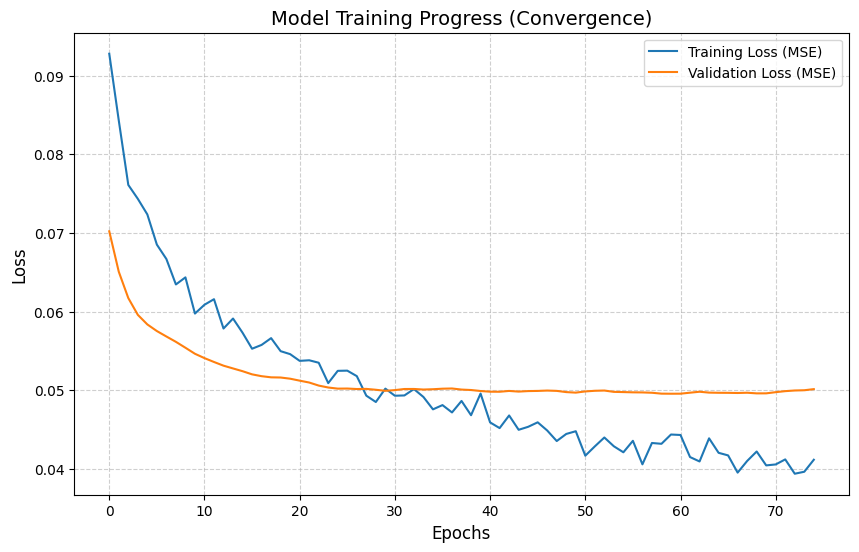

In [12]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Training Progress (Convergence)', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('learning_curve.png', dpi=300) # Save this for your thesis!
plt.show()

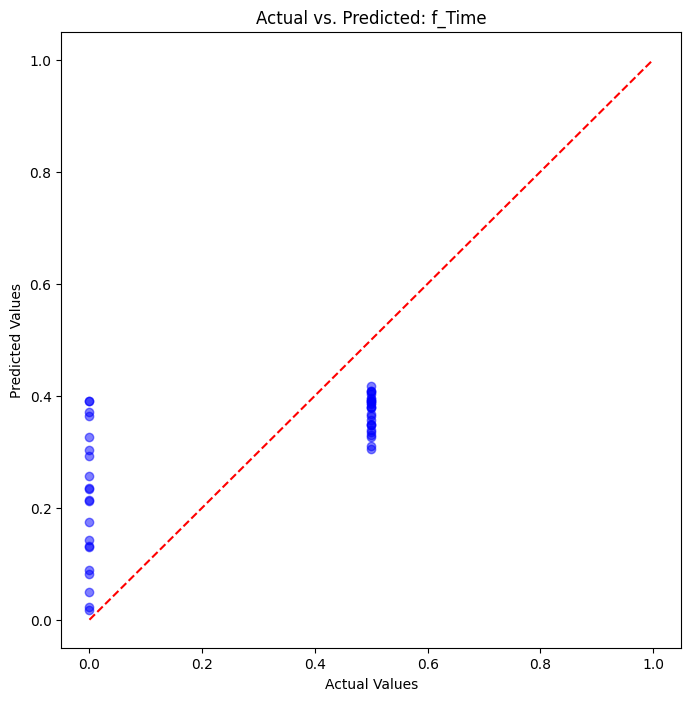

In [13]:
# Select one of your targets to visualize, e.g., 'f_Time'
target_index = 0
plt.figure(figsize=(8, 8))
plt.scatter(y_test.values[:, target_index], pred[:, target_index], alpha=0.5, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Perfect prediction line
plt.title(f'Actual vs. Predicted: {target_cols[target_index]}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()